# ИЗУЧЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ КОРОВ И КАЧЕСТВЕННЫХ ХАРАКТЕРИСТИК МОЛОКА МЕТОДАМИ МАШИННОГО ОБУЧЕНИЯ 

## Цель и задачи исследований: 
 методами машинного обучения выявить основные факторы, влияющие на молочную производительность
 коров и вкусовые характеристики их молока, а также, за счет оптимизации модели, обеспечить оптимальный отбор новых коров,
обладающих требуемыми уровнями продуктивности и качества молока. 

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка данных для анализа](#start)
2. [Предобработка данных](#start1)
3. [Исследовательский анализ данных](#start2)
4. [Корреляционный анализ](#start3)
5. [Обучение модели линейной регрессии](#start4)
6. [Преобразование данных и обновление модели LR](#start5)
7. [Введение нового признака 'Имя_папы' и обновление модели LR](#start6)
8. [Применение модели LR для прогноза удоев](#start7)
9. [Обучение модели логистической регрессии](#start8)
10. [Применение модели логистической регрессии для прогноза вкуса молока](#start9) 
11. [Итоговые вывводы](#start10)
12. [Рекомендации](#start11)

In [1]:
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from scipy.optimize import curve_fit 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

## Загрузка данных
   <a id="start"></a>

In [2]:
df = pd.read_csv('/datasets/ferma_main.csv', sep=r';', encoding='utf-8', decimal=",", engine='python')
df[:5]

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [3]:
df1 = pd.read_csv('/datasets/ferma_dad.csv', sep=r';', encoding='utf-8', engine='python')
df1[:5]

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [4]:
df2 = pd.read_csv('/datasets/cow_buy.csv', sep=r';', encoding='utf-8', decimal=",", engine='python')
df2[:5]

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

<div class="alert alert-info">
  Таблица с исходными данными о фермерских коровах содержит 12 полей и 634 строки. Часть количественных характеристик
(жирность, белок, ЭКЕ, СПО) имеют неверный тип 'object' вместо 'float'.
</div>

##  Предобработка данных 
<a id="start1"></a>

<div class="alert alert-info">
     После загрузки данных с применением параметра decimal все типы данных в столбцах верные: количественные признаки имеют 
тип данных float или int, а категориальные данные имеют тип object.
</div>

In [6]:
df.rename(columns = {'ЭКЕ (Энергетическая кормовая единица)':'ЭКЕ', 'СПО (Сахаро-протеиновое соотношение)':'СПО', 'Сырой протеин, г':'Протеин', 'порода папы_быка':'порода_папы', 'Удой, кг':'Удой_кг', 'Тип пастбища':'тип_пастбища', 'Вкус молока':'вкус_молока', 'Белок,%':'белок', 'Жирность,%':'жирность'}, inplace = True)

In [7]:
df['порода_папы'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [8]:
df['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [9]:
df.loc[df['порода_папы'] == 'Айдиалл', 'порода_папы'] = 'Айдиал'
df.loc[df['тип_пастбища'] == 'Равнинные', 'Тип пастбища'] = 'Равнинное'

In [10]:
df.isna().sum()

id                0
Удой_кг           0
ЭКЕ               0
Протеин           0
СПО               0
Порода            0
тип_пастбища      0
порода_папы       0
жирность          0
белок             0
вкус_молока       0
Возраст           0
Тип пастбища    609
dtype: int64

<div class="alert alert-info">
    Пропусков в столбцах таблицы не обнаружено.
</div>

In [11]:
df.duplicated().sum()

5

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

<div class="alert alert-info">
    Обнаружено 5 дублиукатов в строках таблицы. Так как доля дубликатов составляет менее 1 %, то они были удалены без ущерба
данным.
</div>

## Исследовательский анализ данных
<a id="start2"></a>

In [14]:
d = ['Порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'Возраст']
df[d].nunique()

Порода          2
тип_пастбища    3
порода_папы     2
вкус_молока     2
Возраст         2
dtype: int64

In [15]:
df.loc[df['тип_пастбища'] == 'Равнинные', 'тип_пастбища'] = 'Равнинное'

In [16]:
df['тип_пастбища'].nunique()

2

<div class="alert alert-info">
    Получена таблица числа значений категориальных данных. Поле 'тип_пастбища' имеет 3 значения, а остальные
признаки - по 2 значения. Фактор 'тип_пастбища' преобразован до 2 значений. 
</div>

In [17]:
f = ['Удой_кг', 'ЭКЕ', 'Протеин', 'СПО', 'жирность', 'белок']
df[f].describe()

,Удой_кг,ЭКЕ,Протеин,СПО,жирность,белок
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


<div class="alert alert-info">
    Параметры распределения количественных характеристик показывают, что все исследуемые факторы довольно однородны, так как 
их среднее арифметическое близко к медианному значению. При этом, наибольший размах имеют поля 'Удой' (от 5204 до 45616), 'ЭКЕ'
(от 10,9 до 16,8) и 'Протеин' (от 1660 до 2349). Для них доля std от среднего значения составляет, соответственно, 26%,
9% и 9,5%. То есть, в этих данных присутствуют выбросы в области высоких значений. Менее всего выбросов в поле 'Белок', имеющем
минимальный разброс от 3,069 до 3,085 и долю std к mean порядка 0,08%. 
</div>

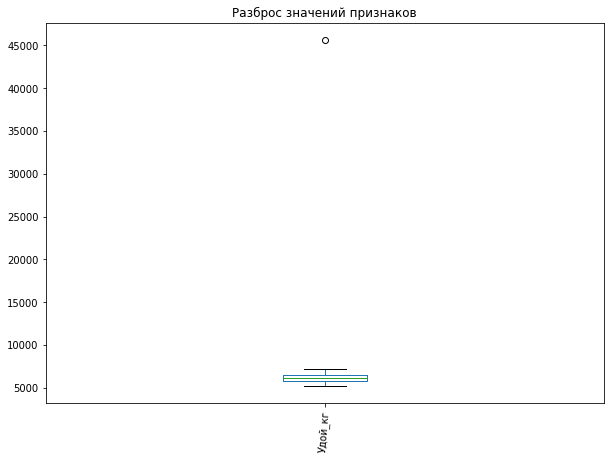

In [18]:
plt.figure(figsize=(10, 7))
df['Удой_кг'].plot(kind='box', rot=85)
plt.title('Разброс значений признаков');

In [19]:
df.loc[df['Удой_кг'] == 45616, 'Удой_кг'] = 4561.6

In [20]:
df['Удой_кг'].describe()

count     629.000000
mean     6123.481081
std       479.551935
min      4561.600000
25%      5746.000000
50%      6132.000000
75%      6501.000000
max      7222.000000
Name: Удой_кг, dtype: float64

<div class="alert alert-info">
    В поле 'Удой_кг' максимальное значение 45616 на порядок выше остальных, что свидетельствует об ошибке данных. Скорее всего
это значение нужно уменьшить на пморядок. После преобразования в данном поле получили данные с близким распределением - 
медиана (6132) очень близка к среднему (6123,5), а размах значений в пределах 4561,6 - 7222. 
</div>

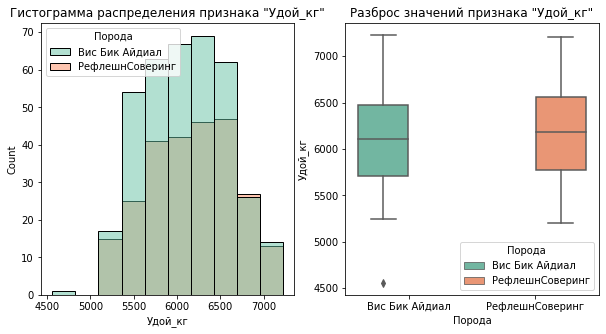

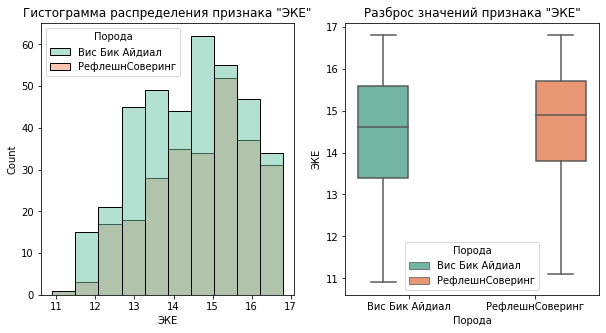

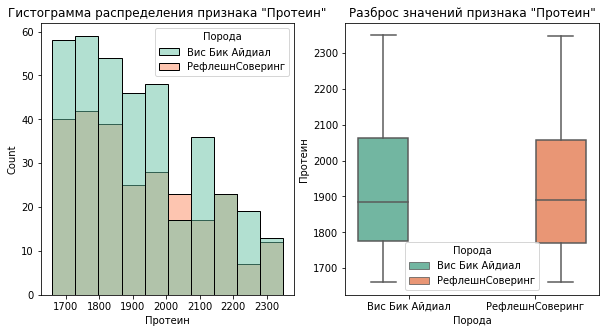

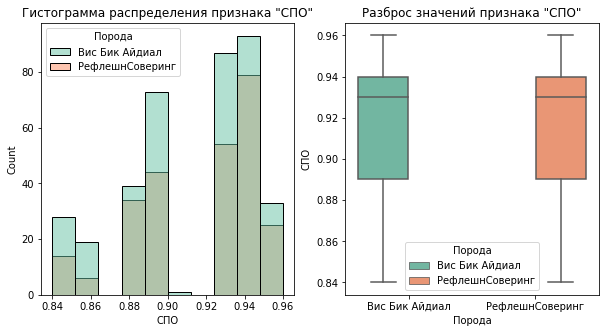

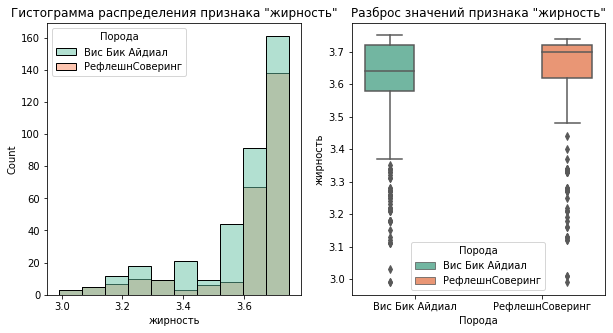

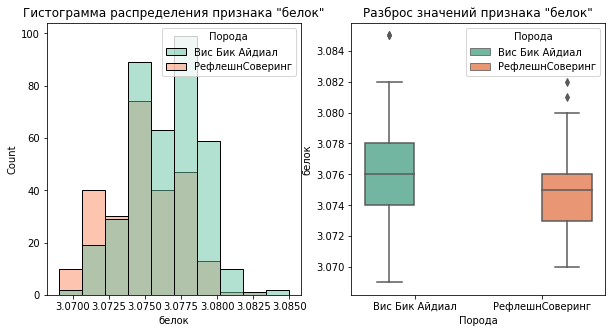

In [21]:
for i in f:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    sns.histplot(data = df, x = df[i], bins=10, ax=axes[0], hue = 'Порода', palette="Set2")
    axes[0].set_title('Гистограмма распределения признака "{}"'.format(i))
    sns.boxplot(data = df, y = df[i], x = 'Порода', ax=axes[1], hue = 'Порода', palette="Set2")
    axes[1].set_title('Разброс значений признака "{}"'.format(i))
    plt.show()

<div class="alert alert-info">
    Для количественных характеристик были построены гистограммы и диаграммы распределения. Признак 'Удой, кг' распределен более-
менее равномерно вокгруг интервала 6000-6500 с небольшим смещением влево. Есть, как минимум 1 выброс в сторону низких значений.
Гистограмма признака 'ЭКЕ' неравномерно распределана вокруг интервала 15 - 15,5 с сильным смещением воево, выбросов значений нет.
Максимум гистограммы признака 'Протеин' приходится на интервал 1700 - 1850, распределение имеет право-односторонний характер 
без выбросов. Гистограмма 'СПО' разбита на 3 интервала (0,84-0,86, 0,88-0,9 и 0,92-0,96), между которыми практически нет точек.
Данная кистогроамма имеет лево-односторонний характер с максимумом в интервале 0,92-0,96, выбросы в распределении 'mСПО' 
отсутствуют. Гистограмма фактора 'Жирность' имеет лево-односторонний характер с максимумом в интервале 3,65-3,75 и с большим 
количеством выбросов в сторону низких значений. Гистограмма фактора 'Белок' имеет двухстороннюю структура с 2 максимумами 
в интервалах 3,074-3,075 и 3,077-3,078. Гистограмма смещена вправо, есть небольшое число выбросов в обе стороны. 
</div>

<div class="alert alert-info">
    Медианные значения жирности молока и удоев породы РефлешнСоверин выше, по сравнению с породой ВисБикАйдиал, которовы
которой имеют, тем не менее, более высокое медианное содержание белка в молоке, по сравнению с РефлешнСоверин. Медианная 
питательность (ЭКЕ) коров РефлешнСоверин выше, по сравнению с коровами ВисБикАйдиал, а остальные характеристики корма 
коров обоих пород (СПО, Протеин) одинаковы. 
</div>

In [22]:
d1 = ['тип_пастбища', 'порода_папы', 'вкус_молока', 'Возраст']

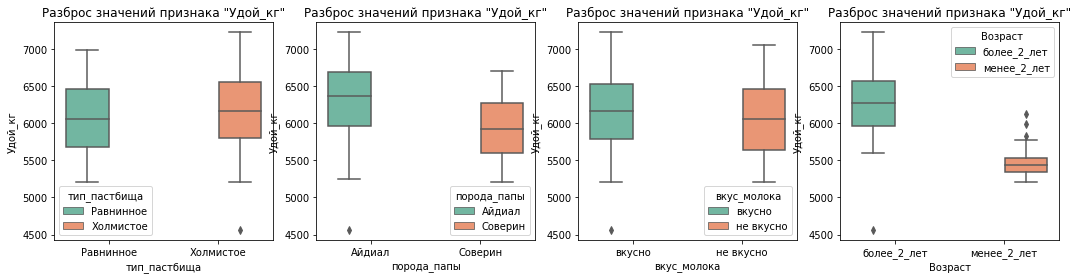

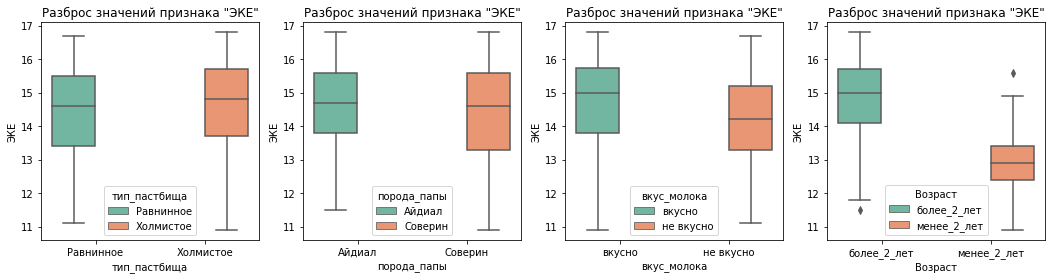

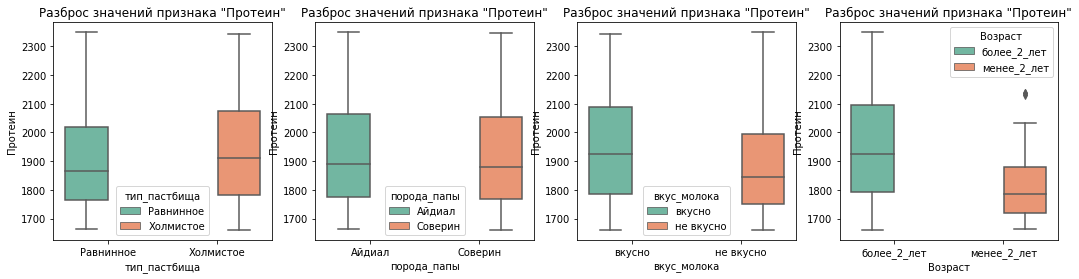

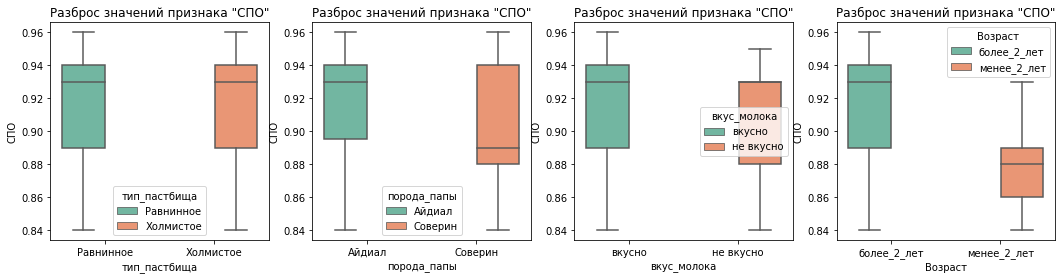

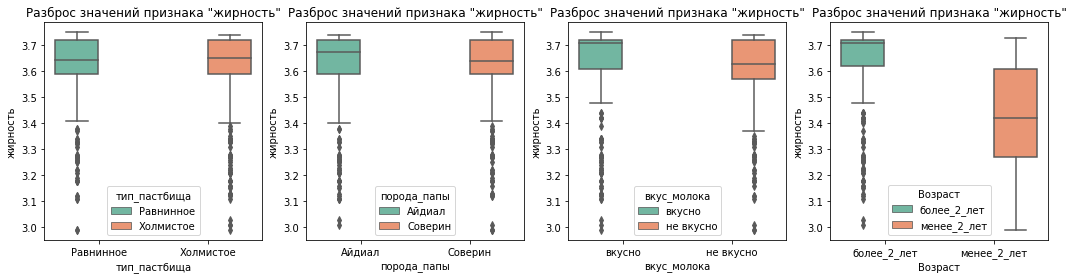

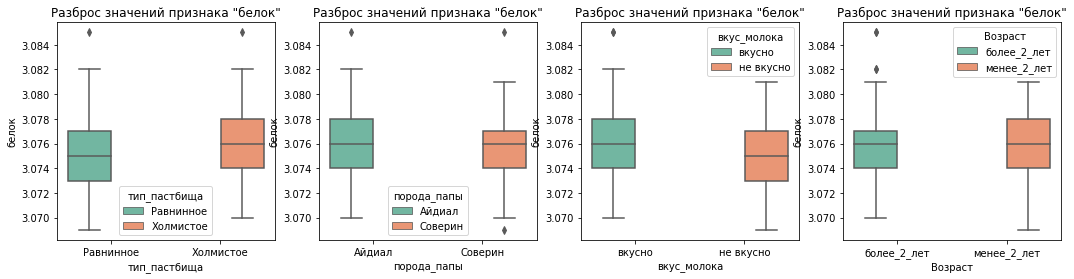

In [23]:
for j in f:  
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
    for i in range(len(d1)):
        sns.boxplot(data = df, y = j, x = d1[i], ax=axes[i], hue = d1[i], palette="Set2")
        axes[i].set_title('Разброс значений признака "{}"'.format(j))

<div class="alert alert-info">
    Были построены диаграммы типа boxplot распределения количественных признаков с учетом значений категориальных признаков.
Коровы, пасущиеся на холмистых пастбищах, имеют более высокий медианный удой, а также дают молоко с более высоким медианным 
содержанием белка, по сравнению с равнинными пастбищами, корм холмистых пастбищ имеет более высокие факторы ЭКЕ и
протеина. Порода папы 'Айдиал' определяет более высокий медианный удой и жирность молока, по сравнению с Соверином. Питание 
потомков Айиала имело более высокое значение СПО (0,93), по сравнению с питанием потомков Соверина (0,89). Вкусное молоко 
характеризуется хаметно более высокими медианными значениями жирности и содержания белка. Корма коров, дающих вкусное молоко,
характкризуются более высокими медианными значениями ЭКЕ, СПО и протеина. Коровы в возрасте более 2 лет имею существенно более
высокий медианный удой (около 6300), по сравнению с коровами возраста менее 2 лет (около 5500). Корма коров возраста более 2 лет
характеризуются существенно более высокими значениями факторов ЭКЕ, протеина и СПО, а медианная жирность молока этих коров (3,7)
выше, чем жирность молока коров возрасте менее 2 лет (3,75).
</div>

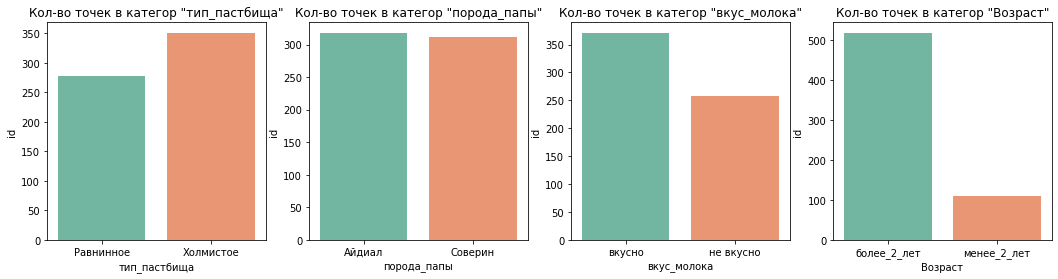

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
for i in range(len(d1)):
    sns.barplot(data = df.groupby(d1[i], as_index = False).agg({'id':'count'}), y = 'id', x = d1[i], ax=axes[i], palette="Set2")
    axes[i].set_title('Кол-во точек в категор "{}"'.format(d1[i]))

<div class="alert alert-info">
    Большинство коров пасутся на холмистых пастбищах, имеют вкусное молоко и старше 2 лет. Количество потомков пород Айдиал и 
Соверин в выборке примерно одинаково. 
</div>

## Корреляционный анализ
<a id="start3"></a>

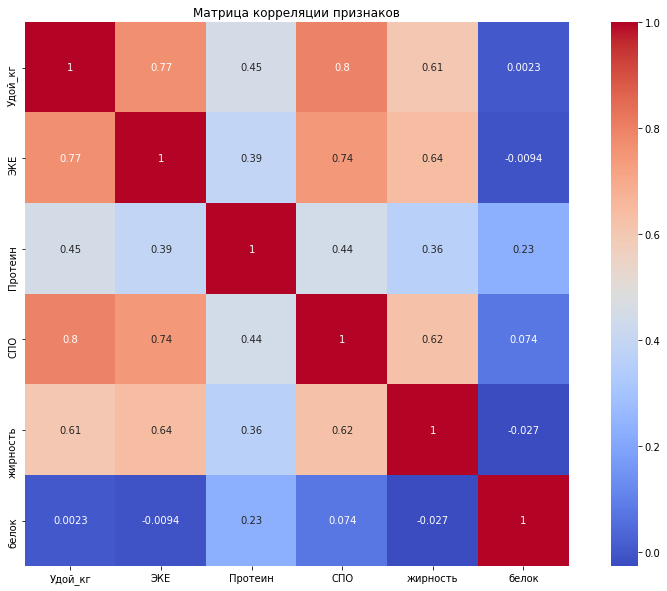

In [25]:
plt.figure(figsize = (15,10))
sns.heatmap(df[f].corr(), annot = True, square = True, cmap='coolwarm')
plt.title('Матрица корреляции признаков');

<div class="alert alert-info">
    Матрица корреляции показывает, что признаки СПО, ЭКЕ, жирность и протеин достаточно хорошо коррелируют с Удоем, коэффициенты
корреляции составляют, соответственно, 0,8, 0,77, 0,61 и 0,45. Фактор 'Белок' на удой не влияет. Есть также взаимная корреляция
влияющих признаков: ЭКЕ умеренно коррелирует с Жирностью (0,64), СПО (0,74) и менее плотно - с протеином (0,39). Жирность 
умеренно коррелирует с СПО (0,62) и слабее с протеином (0,36). Белок практически не коррелирует с остальными количественными
характеристиками, за исключением Протеина, где наблюдается слабая прямая корреляция (0,23).
</div>

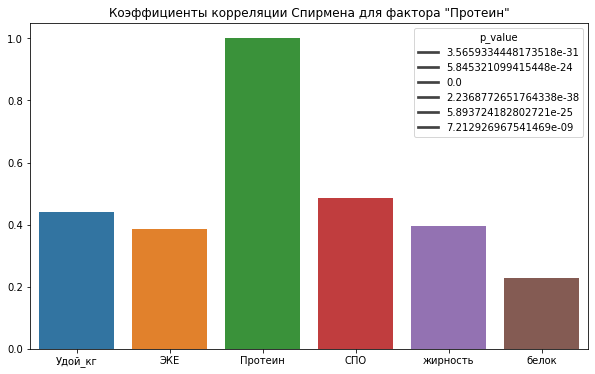

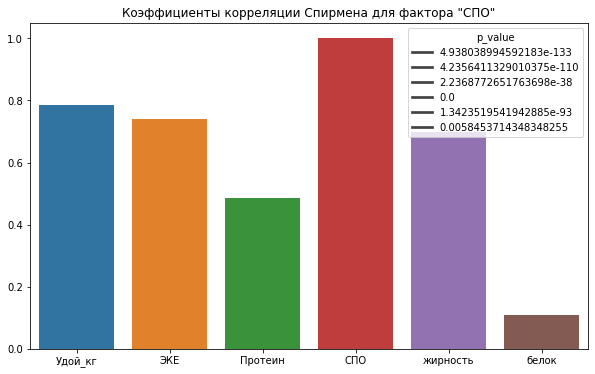

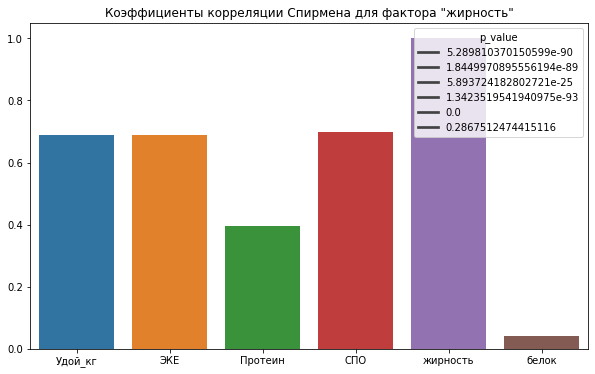

In [26]:
f1 = ['Протеин', 'СПО', 'жирность']

for i, j in enumerate(f1):
    r = []
    w = []
    u = []
    for k, m in enumerate(f):
        rho, p = spearmanr(df[j], df[m])
        r.append(rho)
        w.append(m)
        u.append(p)
    ds = pd.DataFrame([r,u], columns = w)
    plt.figure(figsize=(10, 6))
    sns.barplot(data = ds.iloc[[0]])
    plt.title('Коэффициенты корреляции Спирмена для фактора "{}"'.format(j))
    plt.legend(labels=u, title = 'p_value')

        

<div class="alert alert-info">
    Так как для некоторых количественных характеристик (СПО, протеин и жирность) отсутствует нормальное распределение, то для
выявления взапимной корреляции были построены стобчатые диакграммы коэффициентов ранговой корреляции Спирмена. Удой хорошо
прямопропорционально связан с СПО корма и жирностью молока (коэф корр 0,8 и 0,7, соответственно) и относительно слабо связан 
с пртенином в корме (коэф корр 0,45). Существенная взаимная корреляция существует также в парах: ЭКЕ - Жирность (0,7), 
СПО - Жирность (0,7) И СПО - ЭКЕ (0,75). Более слабая прямая корреляция есть также в парах: Жирность - Протеин (0,4), 
СПО - Протеин (0,5), Протеин - ЭКЕ (0,4), Протенин - Белок (0,2). Все рассчитанные коэффициенты корреляции можно принимать во 
внимание, так как величина p-value для каждой пары существенно ниже 0,05 (кроме пары Жирность - белок, где p-value = 0.29). 
</div>

In [27]:
f.remove('Удой_кг')

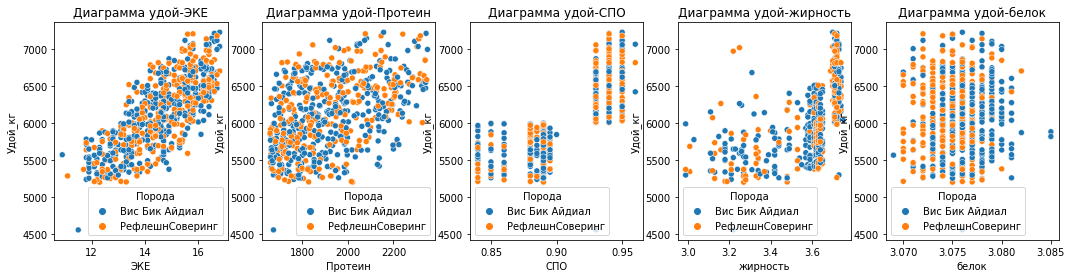

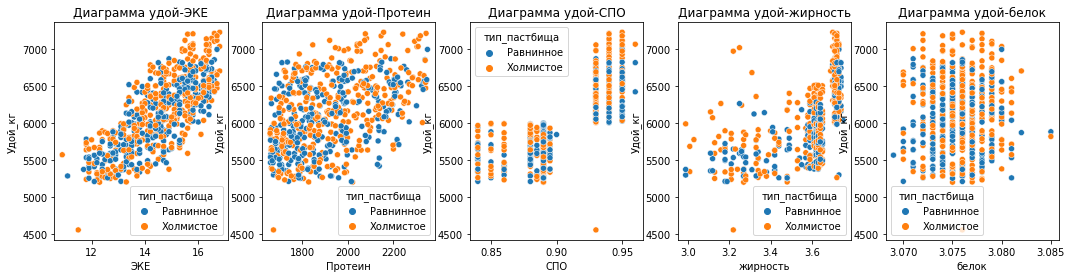

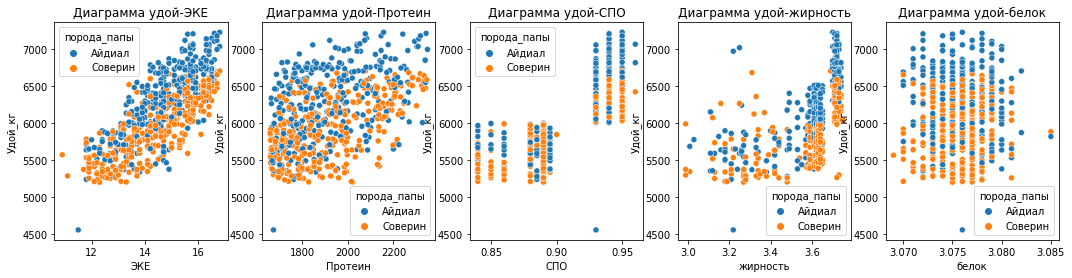

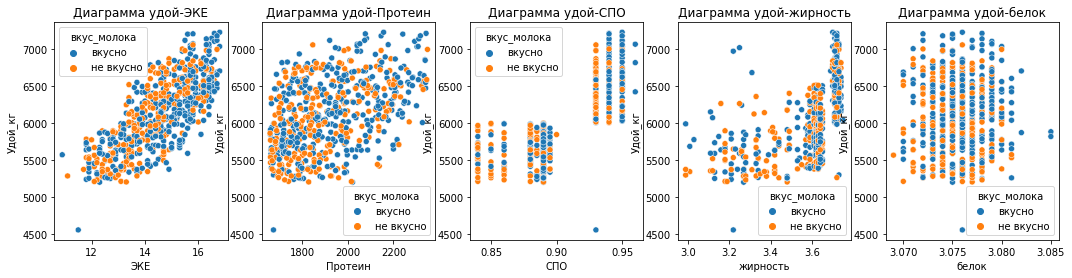

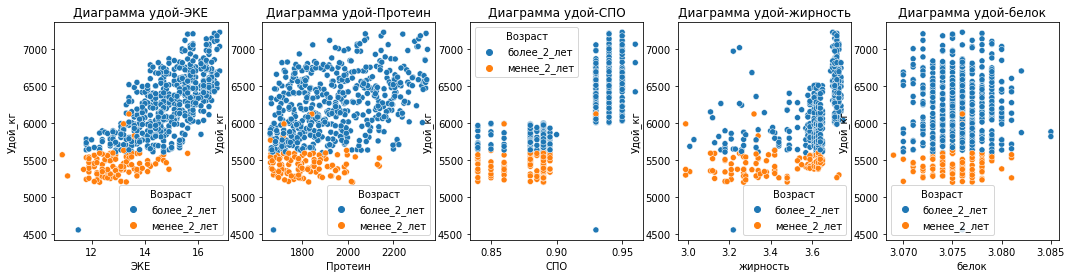

In [29]:
for k in d:
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18,4))
    for i, j in enumerate(f):
        sns.scatterplot(x = j, y = 'Удой_кг', data = df, hue = k, ax = axes[i])
        axes[i].set_title('Диаграмма удой-{}'.format(j))


<div class="alert alert-info">
    Точечная диаграмма распределения удоя при увеличении ЭКЕ, в целом, характеризует прямопропорциональную зависимость во всех
группах при разбивке по типам пород и пастбищ, а также по показателю вкуса. Зависимости удоя от ЭКЕ по признакам порода папы и 
возраст более фрагментированы: при разбивке по породе папы в обоих группах наблюдается прямая зависимость Удой-ЭКЕ, но группа 
Айдиал, в целом, имеет более высокие удои, чем группа Северин. Также, при разбивке по возрасту зависимость удои-ЭКЕ в группе 
'более 2 лет' прямопропорциональна, а в группе 'менее 2 лет' удои отчетливо ниже, а какая-либо зависимость в паре удои-ЭКЕ 
отсутствует. В паре удои-протеин при разбивке по породе, типу пастбища и вкусу получаются однородные группы, в которых
наблюдается близкая к нулю прямая зависимость, причем в подгруппах 'вкусно' и 'холмистые' эта прямая зависимость немного больше
выражена. При разбивке по породе папы и возрасту подгруппы 'Айдиал' и 'более 2 лет' отчетливо лидируют по удоям, причем в этих
подгруппах слабая прямая зависимость в паре удои-ЭКЕ немного более выражена. Опять же в подгруппе 'менее 2 лет' зависимость в 
паре удои-ЭКЕ полностью отсутствует.
    В целом, зависимость в паре 'удой - ЭКЕ' близка к степенной (квадратичной), так как Удой с ростом ЭКЕ увеличивается 
слишком быстро, по сравнению с линейной зависимостью.
</div>

 <div class="alert alert-info"> 
    В паре удои-СПО на всех диаграммах наблюдается разрыв непрерывности и распределение точек на три группы: первые 2 группа в 
окрестностях 0,85 и 0,9 СПО имеют одинаковый средний уровень удоев, а третья группа в окрестности СПО = 0,95 имеет средний 
уровень удоев примерно на 1000 выше, чем в первых 2 группах. При этом во всех 3 группах какая-либо зависимость в паре удои-СПО 
отсутствует. Порода 'Вис бик Айдиал' больше представлена во 2 группе СПО (0,9), а порода 'РефрешнСоверинг' - в 3 высокоудойной 
группе СПО (0,95). Точки в подгруппах по признаку 'пастбища' более-менее равномерно распределены во всех группах СПО, а точки с
признаком 'вкусно' преобладают в высокоудойной группе СПО (0,95). Точки с признаками 'Айдиал' и 'более 2 лет' абсолютно 
доминируют в более удойной группе СПО (0,95), а в остальных группах СПО (0,85 и 0,9) также преобладают в верхних областях 
диаграммы. 
   В целом, в паре 'удой - СПО' наблюдается ступенчатая зависимость, которая является основой для преобразования данного 
признака в категориальный.
</div>

<div class="alert alert-info"> 
    На диаграммах пары удои-жирность также присутствует разрыв непрерывности в окрестности
значения жирности 3,7. Для этой пары также выделяются 3 области диаграммы: разряженная в интервале жирности 3 - 3,5 (низкая
плотность точек) и 2 плотных группы: с жирностью 3,6 и жирностью 3,8. Во всех этих группах жирности зависимость в паре 
удои - жирность практически отсутствует, а группы жирности отличаются средними удоями: группа жирности 3 - 3,5 имеет средний удой
около 5500, для группы с жирностью 3,6 средние удои - около 6000, а группа с жирностью 3,8 имеет наибольший средний удой - 
порядка 6500. Все точки с разными породами, типами пастбищ и признаками фвкуса более-менее равномерно распределены по всем 3
группам жирности (холмистые пастбища немного доминируют, по сравнению с равнинными во всех группах жирности). Точки с возрастом
'более 2 лет' и породой 'Айдиал' доминируют в верхней части диаграммы во 2 и 3 группах жирности (3,6 и 3,8), но в разряженной 
группе с низкой жирностью (3 - 3,5) породы Айдиал и РефрешнСоверинг распределены равномерно, а возраст 'более 2 лет' абсолютно
доминирует в области повышенных удоев. 
     В целом в паре 'Удой - жирность' присутствует ступенчатая зависимость, которая является основанием перевода данного 
признака в категориальный.
</div>

 <div class="alert alert-info"> 
    На диаграммах удои-белок заметной зависимости не обнаруживается. В молоке породы 
'Вис Бик Айдиал' относительно более высокое содержание белка, по сравнению с породой 'РефрешнСоверинг'. Точки в подгруппах
'тип пастбища' и 'порода_папы' в паре удои-белок точки распределены равномерно, но в погруппах 'Холмистое' и 'Айдиал' преобладают
точски с более высокими удоями. Точки в категориях 'вкусно' и 'невкусно' равномерно распределены на диаграмме удои-белок, а в 
категории 'более 2 лет' точки с относительно высокими удоями доминируют.  
</div>

 <div class="alert alert-info"> 
    На диаграммах пары 'Удой - протеин' наблюдается прямая линейная зависимость. Для породы Айдиал величина удоев заметно 
выше, чем для породы РефрешнСоверинг. Также коровы старше 2 лет дают существенно более высокие удои, чем коровы младше 2 лет
</div>

In [30]:
y, X = dmatrices('Удой_кг ~ ЭКЕ+Протеин+СПО+жирность+белок', data=df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Признаки'] = X.columns
vif

,VIF,Признаки
0,1.568396e+06,Intercept
1,2.553456e+00,ЭКЕ
2,1.344021e+00,Протеин
3,2.578900e+00,СПО
4,1.879355e+00,жирность
5,1.079248e+00,белок


<div class="alert alert-info">
    Степень взаимной корреляции количественных признаков проверена с помощью оценки для каждого признака коэффициента инфляции
дисперсии (VIF), который характеризует степень корреляции между данным признаком и другими признаками модели. Проверка 
показала, что коэффициенты VIF для всех факторов существенно меньше 5 (лежат в пределах 1 - 3), что означает умеренную
взаимнную корреляцию, которая недостаточно велика, чтобы повлиять на надежность модели.
</div>

## Обучение модели линейной регрессии
<a id="start4"></a>

In [31]:
g = ['ЭКЕ', 'Протеин', 'СПО']
t = ['тип_пастбища', 'порода_папы', 'Возраст']

<div class="alert alert-info">
    Из количественных признаков самый сомнительный 'Белок', так как корреляция между данным показателем и целью ('Удои') 
практически отсутствует. Однако, 'Белок' слабо связан с 'Протеином' (корр 0,23), а 'Протеин' имеет отчетливую прямую связь с
целью (корр 0,45), поэтому 'Белок' полезно оставить в списке влияющих признаков. Из категориальных признаков более всего влияют
на цель 'Возраст', 'порода_папы' и немного 'тип пастбища', а признаки 'порода' и 'Вкус молока' практически не влияют на Удои, и
их можно исключить.
</div>

In [32]:
RANDOM_STATE = 42
X = df.drop('Удой_кг', axis=1)
y = df['Удой_кг']

In [33]:
def fract(X, y, R):
    X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=R)
    return X_train, X_test, y_train, y_test
    

In [34]:
X_train, X_test, y_train, y_test = fract(X, y, RANDOM_STATE)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[g])
X_test_scaled = scaler.transform(X_test[g])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=g)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=g)

In [36]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[t])
X_test_ohe = encoder.transform(X_test[t])

encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [37]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [38]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [39]:
def metrics(y_true, y_pred):
    print('MAE: {:.2f}'.format(mean_absolute_error(y_true,y_pred)))
    print('MSE: {:.2f}'.format(mean_squared_error(y_true,y_pred)))
    print('R2: {:.2f}'.format(r2_score(y_true,y_pred)))

In [40]:
metrics(y_test, y_pred)

MAE: 178.71
MSE: 48243.23
R2: 0.82


<div class="alert alert-info">
    Ошибка модели линейной регрессии r2 составляет 0,83, то есть модель ошибается в предсказании в 17% случаев.  
</div>

In [41]:
residuals = y_test - y_pred

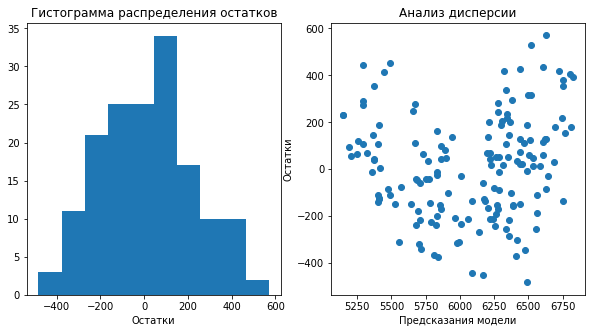

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = y_pred, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

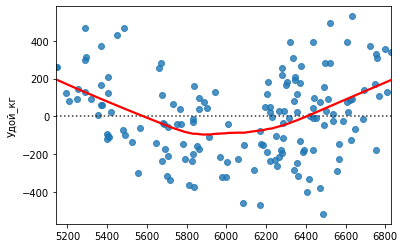

In [43]:
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws=dict(color="r"));

<div class="alert alert-info">
     Гистограмма распределения остатков модели показывает распределение близкое к нормальному с небольшим смещением вправо. 
Точечная диаграмма распределения остатков показывает определенную зависимость между остатками и предсказаниями, имеющую форму
вогнутой дуги. 
</div>

<div class="alert alert-info">
     В целом, ошибка модели r2 (0,82) и анализ остатков свидетельствуют о недостаточном качестве модели линейной регрессии из-за
отсутствия линейной зависимости между целью и одним или несколькими признаками. 
</div>

## Преобразование данных и обновление модели LR
<a id="start5"></a>

In [44]:
df['ЭКЕ_2'] = df['ЭКЕ'] 
def s(x):
    return x**2
df['ЭКЕ_2'] = df['ЭКЕ_2'].apply(s)
df['Удой_кг'].corr(df['ЭКЕ_2']), df['Удой_кг'].corr(df['ЭКЕ'])

(0.7674114893181806, 0.7674098980487164)

<div class="alert alert-info">
     Для зависимости цели от признака 'ЭКЕ' возведение аргумента в квадрат малоэффективно и практически не влияет на коэффициент
корреляции.
</div>

In [45]:
def s1(x):
    if x <= 0.9:
        return 'СПО_L'
    else:
        return 'СПО_H'
df['СПО_'] = df['СПО'].apply(s1)

In [46]:
def s2(x):
    if x <= 3.7:
        return 'Жирн_L'
    else:
        return 'Жирн_H'
df['Жирность_'] = df['жирность'].apply(s2)

In [47]:
g = ['ЭКЕ_2', 'Протеин']
t = ['тип_пастбища', 'порода_папы', 'Возраст', 'СПО_']

In [48]:
X = df.drop(['ЭКЕ', 'СПО', 'жирность', 'Удой_кг'], axis=1)
y = df['Удой_кг']

In [49]:
X_train, X_test, y_train, y_test = fract(X, y, RANDOM_STATE)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[g])
X_test_scaled = scaler.transform(X_test[g])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=g)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=g)

In [51]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[t])
X_test_ohe = encoder.transform(X_test[t])

encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [52]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [53]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [54]:
metrics(y_test, y_pred)

MAE: 163.19
MSE: 41770.76
R2: 0.85


In [55]:
residuals = y_test - y_pred

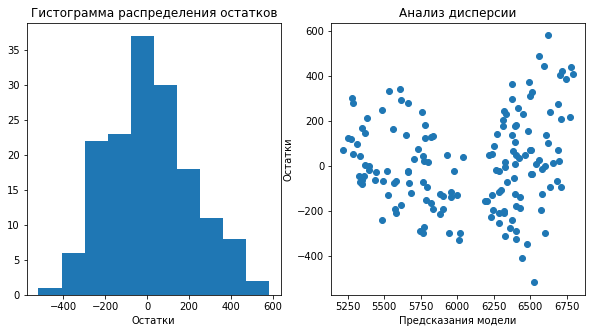

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = y_pred, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

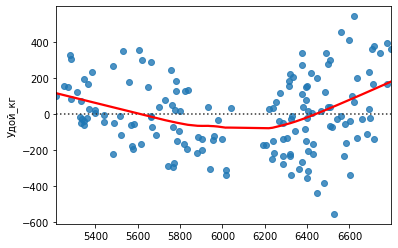

In [57]:
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws=dict(color="r"));

<div class="alert alert-info">
     После перевода нелинейных количественных признаков в катериальные метрики модели немного улучшились: r2 вырос с 0,82 до 0,85, 
а также немного снизились MAE и MSE. Распределение остатков приблизилось к нормальному без сдвигов, но с наличием выбросов левее
нуля. Точечное распределение остатков сохраняет дугообразую, хотя и менее выраженную форму.  
</div>

## Введение нового признака 'Имя_папы' и обновление модели LR
<a id="start6"></a>

In [58]:
df1.isna().sum()

id          0
Имя Папы    0
dtype: int64

In [59]:
len(df1['Имя Папы'].unique())

4

In [60]:
df1.iloc[[200]]['id']

200    201
Name: id, dtype: int64

In [61]:
count = 0
for i in range(629):
    if list(df.iloc[[i]]['id'])[0] != list(df1.iloc[[i]]['id'])[0]:
        count += 1
count

0

<div class="alert alert-info">
     Таблица с именем папы имеет столько же строк, что и главная таблица с удоями, поэтому их можно объединить по полю 'id' 
коровы. Пропусков в имени папы нет, типы данных верные.
     Установлено полное совпаденние значений в столбцах 'id' исходной таблицы df и таблицы с именем_папы df1.
</div>

In [62]:
df_ = df.merge(df1, on='id', how='inner')
df_[:5]

,id,Удой_кг,ЭКЕ,Протеин,СПО,Порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,Возраст,Тип пастбища,ЭКЕ_2,СПО_,Жирность_,Имя Папы
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,NaN,201.64,СПО_L,Жирн_L,Буйный
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Равнинное,163.84,СПО_L,Жирн_L,Соловчик
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,NaN,196.00,СПО_L,Жирн_L,Барин
3,4,5895.0,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,NaN,153.76,СПО_L,Жирн_L,Буйный
4,5,5302.0,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Равнинное,163.84,СПО_L,Жирн_H,Барин


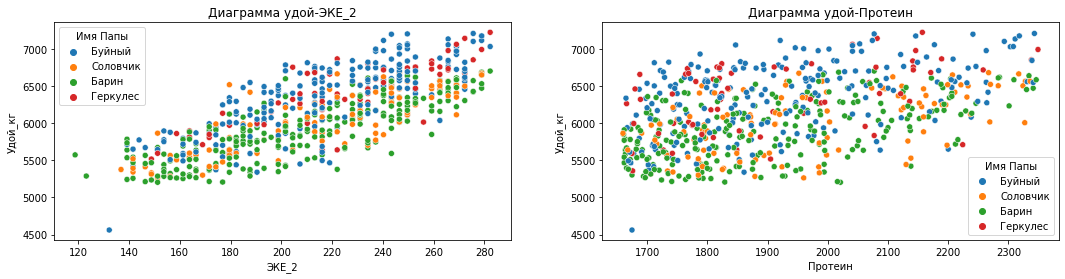

In [63]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
for i, j in enumerate(g):
    sns.scatterplot(x = j, y = 'Удой_кг', data = df_, hue = 'Имя Папы', ax = axes[i])
    axes[i].set_title('Диаграмма удой-{}'.format(j));

<div class="alert alert-info">
     Новый фактор 'Имя Папы' определенно влияет на цель: на диаграммах Удой-ЭКЕ_2 и Удой-Протеин видно, что потомство Буйного и 
Геркулеса дает более высокие удои, у потомков Барина удои заметно ниже.  
</div>

In [64]:
X = df_.drop(['ЭКЕ', 'СПО', 'жирность', 'Удой_кг'], axis=1)
y = df_['Удой_кг']

In [65]:
g = ['ЭКЕ_2', 'Протеин']
t = ['тип_пастбища', 'порода_папы', 'Возраст', 'СПО_', 'Имя Папы']

In [66]:
X_train, X_test, y_train, y_test = fract(X, y, RANDOM_STATE)

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[g])
X_test_scaled = scaler.transform(X_test[g])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=g)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=g)

In [68]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[t])
X_test_ohe = encoder.transform(X_test[t])

encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [69]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [70]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [71]:
metrics(y_test, y_pred)

MAE: 152.62
MSE: 37073.28
R2: 0.86


In [72]:
residuals = y_test - y_pred

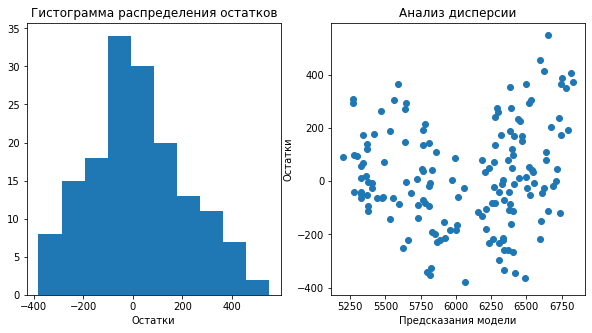

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = y_pred, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

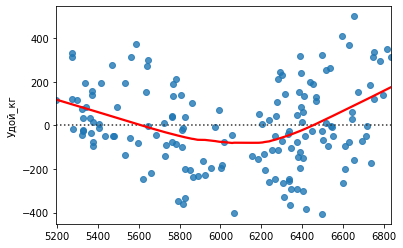

In [74]:
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws=dict(color="r"));

<div class="alert alert-info">
     После введения нового признака 'Имя Папы' точность модели выросла: метрика r2 увеличилась до 0,86. Распределение остатков
стало более симметричным относительно 0, и на гистограмме исчезли выбросы. Точечное распределение на диаграмме 
остатки-предсказания по-прежнему имеет определенную дугообразную зависимость. 
</div>

In [75]:
for i in range(9):
    print(X_train.columns[i], ' :', model_lr.coef_[i])

x0_Холмистое  : 50.74111301886065
x1_Соверин  : 1.217517846072525
x2_менее_2_лет  : -200.85524969190436
x3_СПО_L  : -342.1241013037998
x4_Буйный  : 249.73005199729232
x4_Геркулес  : 245.616814521275
x4_Соловчик  : 41.25839628567599
ЭКЕ_2  : 164.56620253497505
Протеин  : 44.47436814253789


<div class="alert alert-info">
     Согласно значениям коэффициентов регрессии, наибольший уклад в удой коровы вносят принадлежность к потомству Буйного и 
Геркулеса. Кром того, важна энергетическая ценность корма ЭКЕ_2 (162).
</div>

## Применение модели LR для пргноза удоев
<a id="start7"></a>

In [76]:
df2.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

<div class="alert alert-info">
     Таблица df2 с данными для расчета удоев содержит 20 рядов и не имеет пропусков данных. Тип категориальных данных верный
(object), а числовой столбец 'Текущая_жирность,%' был преобразован в тип float. Столбец 'Текущий_уровень_белок,%' также имеет
неверный тип object, но данные этого столбца не используются в модели из-за отсутствия связи между белком и целью.
</div>

In [77]:
w = [df_['ЭКЕ_2'].mean()*1.05, df_['Протеин'].mean()*1.05, df_['СПО'].mean()*1.05]
w

[223.88983068362478, 2019.5322734499207, 0.9587718600953894]

In [78]:
df2.rename(columns = {'порода папы_быка':'порода_папы', 'Имя_папы':'Имя Папы', 'Текущий_уровень_белок,%':'белок', 'Тип пастбища':'тип_пастбища'}, inplace = True)

In [79]:
df2['порода_папы'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [80]:
df2['Имя Папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [81]:
df2['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [82]:
df2['ЭКЕ_2'] = w[0]
df2['Протеин'] = w[1]
df2['СПО'] = w[2]

In [83]:
df2['СПО_'] = df2['СПО'].apply(s1)
df2['Жирность_'] = df2['Текущая_жирность,%'].apply(s2)

In [84]:
df2.loc[df2['тип_пастбища'] == 'холмистое', 'тип_пастбища'] = 'Холмистое'
df2.loc[df2['тип_пастбища'] == 'равнинное', 'тип_пастбища'] = 'Равнинное'

In [85]:
X_new_scaled = scaler.transform(df2[g])
X_new_scaled = pd.DataFrame(X_new_scaled, columns=g)

In [86]:
X_new_ohe = encoder.transform(df2[t])
X_new_ohe = pd.DataFrame(X_new_ohe, columns=encoder_col_names)

<div class="alert alert-info">
     Категориальные признаки в таблице с новыми данными (df2) проверены на соответствия значений с аналогичными признаками
в исходной таблице (df) 
</div>

In [87]:
X_new = pd.concat([X_new_ohe, X_new_scaled], axis=1)

In [88]:
y_pred_new = model_lr.predict(X_new)

In [89]:
df2['Удой_прогноз'] = y_pred_new
df2.drop(['Текущая_жирность,%', 'СПО'], axis=1)[:5]

,Порода,тип_пастбища,порода_папы,Имя Папы,белок,Возраст,ЭКЕ_2,Протеин,СПО_,Жирность_,Удой_прогноз
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.076,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6516.178183
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.081,менее_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6269.912576
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.074,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6221.037774
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.061,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6520.291421
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.074,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6469.550308


In [90]:
df_['Удой_кг'].mean(), df2['Удой_прогноз'].mean()

(6123.481081081081, 6370.873359611449)

In [91]:
st.t.interval(alpha=0.95, df=len(y_pred_new)-1, loc=np.mean(y_pred_new), scale=st.sem(y_pred_new)) 

/tmp/ipykernel_31/1273370210.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(y_pred_new)-1, loc=np.mean(y_pred_new), scale=st.sem(y_pred_new))


(6306.852635673602, 6434.894083549296)

<div class="alert alert-info">
     Рассчитан доверительный интервала прогнозных удоев, согласно которому среднее значение совокупности прогнозных удоев с 
вероятностью 95 % лежит в интервале 6306,9 - 6434,9 кг. 
</div>

In [92]:
st.norm.interval(alpha=0.95, loc=np.mean(df_['Удой_кг']), scale=st.sem(df_['Удой_кг']))

/tmp/ipykernel_31/2255571238.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.norm.interval(alpha=0.95, loc=np.mean(df_['Удой_кг']), scale=st.sem(df_['Удой_кг']))


(6086.004633627136, 6160.9575285350265)

<div class="alert alert-info">
     Границы доверительного интервала распределения известных значений удоев на основе исходных данных (6086,9 - 6161,0)
располагаются ниже, по сравнению с границами доверительного интервала совокупности прогнозных удоев (6306,9 - 6434,9) с 
одинаковым уровнем вероятности 95 %, причем эти интервалы не пересекаются. Это означает, что с вероятностью 95 % средний 
прогнозный удой будет выше среднего удоя в таблице исходных данных. 
</div>

<div class="alert alert-info">
     Лучшей лийнейной моделью для оценки потенциального удоя коров является третья модель, включающая фактор имя_папы: данная
модель имеет наибольшее значение метрики r2 (0.86), а также минимальные значения метрик MSE (35057) и MAE (150). Данная модель
была использована для оценки удоев с учетом усреднения имеющихся значений факторов СПО, Жирности и ЭКЕ, которые также были 
увеличены на 5 % по условию исследования. В результате, средний прогнозный удой составляет 6373,2 кг, что на 249.7 кг выше, по 
сравнению со средним удоем коров в исходных данных (6123,5 кг). Доверительный интервал совокупности прогнозных удоев также 
расположен выше, по сравнению с доверительным интервалом известных удоев в исходной таблице. 
</div>

## Обучение модели логистической регрессии
<a id="start8"></a>

In [93]:
df.columns

Index(['id', 'Удой_кг', 'ЭКЕ', 'Протеин', 'СПО', 'Порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'Возраст',
       'Тип пастбища', 'ЭКЕ_2', 'СПО_', 'Жирность_'],
      dtype='object')

In [94]:
g = ['ЭКЕ_2', 'Протеин', 'белок']
t = ['тип_пастбища', 'порода_папы', 'Возраст', 'СПО_', 'Жирность_', 'Имя Папы']

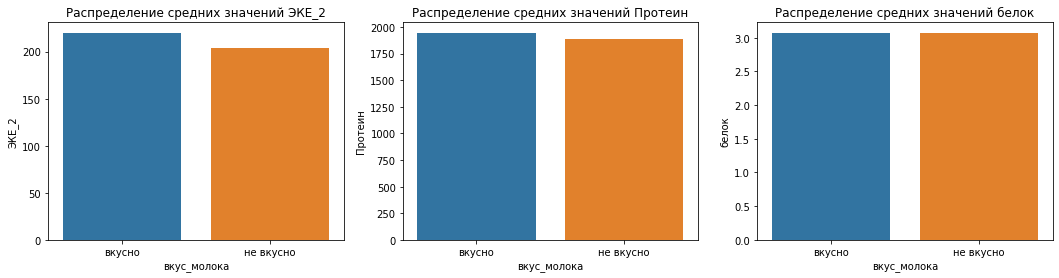

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
for i, j in enumerate(g):
    sns.barplot(x = 'вкус_молока', y = j, data = df_.groupby('вкус_молока', as_index = False).agg({j:'mean'}), ax = axes[i])
    axes[i].set_title('Распределение средних значений {}'.format(j));

<div class="alert alert-info">
     Средние значения количественных характеристик влияющих факторов распределяются таким образом, что вкусное молоко 
характеризуется относительно более высокими значениями ЭКЕ_2 и Протеина. Белок же не влияет на вкус молока и его можно исключить.
</div>

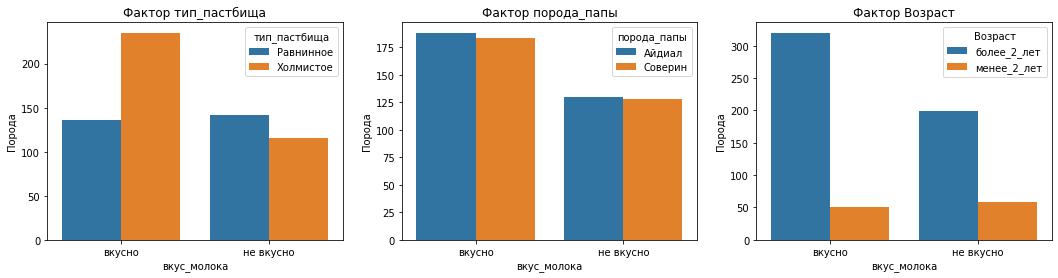

In [96]:
t1 = ['тип_пастбища', 'порода_папы', 'Возраст']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
for i, j in enumerate(t1):
    sns.barplot(x = 'вкус_молока', y = 'Порода', data = df_.groupby(['вкус_молока', j], as_index = False).agg({'Порода':'count'}), hue = j, ax = axes[i])
    axes[i].set_title('Фактор {}'.format(j));

<div class="alert alert-info">
     Факторы Тип пастбища и Возраст значительно влияют на вкус молока: большинство коров со вкусным молоком паслись на 
холмистых пастбищах и имели возраст более 2 лет. Порода_папы влияет на вкус молока очень слабо с небольшим преобладанием 
фактора 'Айдиал'.
</div>

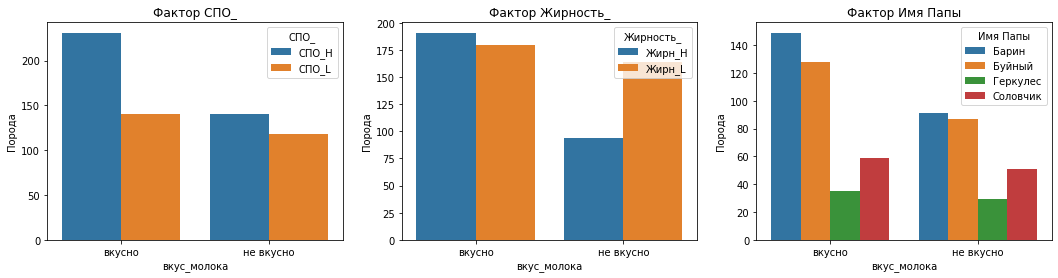

In [97]:
t2 = ['СПО_', 'Жирность_', 'Имя Папы']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
for i, j in enumerate(t2):
    sns.barplot(x = 'вкус_молока', y = 'Порода', data = df_.groupby(['вкус_молока', j], as_index = False).agg({'Порода':'count'}), hue = j, ax = axes[i])
    axes[i].set_title('Фактор {}'.format(j));

<div class="alert alert-info">
     Число коров со вкусным молоком преобладают в случае относительно высоких значений фактороа СПО (СПО_Н) и жирности (Жирн_H).
Кроме того, число коров со вкусным молоком заметноь убывает в ряду потомков Барина - Буйного - Соловчика - Геркулеса.  
</div>

In [98]:
df_.loc[df_['вкус_молока'] == 'вкусно', 'вкус_молока'] = 1
df_.loc[df_['вкус_молока'] == 'не вкусно', 'вкус_молока'] = 0
df_['вкус_молока'] = df_['вкус_молока'].astype(float)

In [99]:
df_[:5]

,id,Удой_кг,ЭКЕ,Протеин,СПО,Порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,Возраст,Тип пастбища,ЭКЕ_2,СПО_,Жирность_,Имя Папы
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1.0,более_2_лет,NaN,201.64,СПО_L,Жирн_L,Буйный
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1.0,менее_2_лет,Равнинное,163.84,СПО_L,Жирн_L,Соловчик
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0.0,более_2_лет,NaN,196.00,СПО_L,Жирн_L,Барин
3,4,5895.0,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0.0,более_2_лет,NaN,153.76,СПО_L,Жирн_L,Буйный
4,5,5302.0,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1.0,менее_2_лет,Равнинное,163.84,СПО_L,Жирн_H,Барин


In [100]:
X = df_.drop('вкус_молока', axis=1)
y = df_['вкус_молока']

In [101]:
X_train, X_test, y_train, y_test = fract(X, y, RANDOM_STATE)

In [102]:
X_train_scaled = scaler.fit_transform(X_train[g])
X_test_scaled = scaler.transform(X_test[g])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=g)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=g)

In [103]:
X_train_ohe = encoder.fit_transform(X_train[t])
X_test_ohe = encoder.transform(X_test[t])

encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [104]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [105]:
clf = LogisticRegression(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [106]:
for i, j in enumerate(X[g].columns):
    print(j, round(clf.coef_[0, i],2))

ЭКЕ_2 0.64
Протеин 0.22
белок -0.07


In [107]:
for i, j in enumerate(X_train.columns):
    r = clf.coef_[0, i]
    print(f"{j:<20}: {r:+.6f}") 

x0_Холмистое        : +0.635092
x1_Соверин          : +0.215525
x2_менее_2_лет      : -0.069248
x3_СПО_L            : +0.930016
x4_Жирн_L           : -0.518017
x5_Буйный           : +0.045875
x5_Геркулес         : +0.096486
x5_Соловчик         : -0.606242
ЭКЕ_2               : +0.473175
Протеин             : +0.240102
белок               : +0.195371


In [108]:
for i, j in enumerate(X_train.columns):
    r = math.exp(clf.coef_[0, i])
    print(f"{j:<20}: {r:+.6f}") 

x0_Холмистое        : +1.887195
x1_Соверин          : +1.240513
x2_менее_2_лет      : +0.933096
x3_СПО_L            : +2.534548
x4_Жирн_L           : +0.595700
x5_Буйный           : +1.046944
x5_Геркулес         : +1.101294
x5_Соловчик         : +0.545397
ЭКЕ_2               : +1.605082
Протеин             : +1.271379
белок               : +1.215762


<div class="alert alert-info">
     Рассчитаны коэффициенты логистической регрессии в логарифмическом и экспоненциальном выражениях. Наибольший вклад в 
факт признания молока вкусным вносит принадлежность объенкта к группе СПО_L (2,53) и холмистому пастбищу (1,89). Также 
вероятность получить вкусное молоко растет при увеличении количественных признаков корма - ЭКЕ_2 (1,6), Протеина (1,27) и
белка (1,21).
</div>

<div class="alert alert-info">
     Из количественных характеристик наибольший вес имеет фактор ЭКЕ (0,64), далее идет Протеин (0,22), а Белок практически
не влияет на результат (-0,07). 
</div>

In [109]:
def metrics_log(y_true, y_pred):
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [110]:
metrics_log(y_test, y_pred)

	Accuracy: 0.65
	Precision: 0.69
	Recall: 0.76


<div class="alert alert-info">
     Метрика точности модели относительно верных позитивных (TP) и негативных (TN) прогнозов accuracy составляет 0,65. При 
этом способность модели находить целевой признак (Recall) составляет 0,76 и превосходит точность модели при идентификации
цели (Precision = 0.69). 
</div>

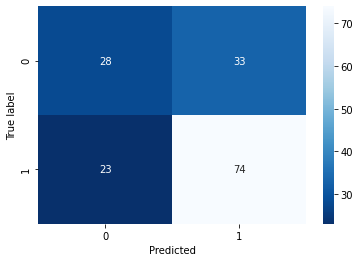

In [111]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

<div class="alert alert-info">
     Матрица ошибок показывает, что на тестовой выборке модель выдает 28 правильных ответов тип TN и 74 правильных ответа 
типа TP, а также 33 ошибки первого рода (FP) и 23 ошибок второго рода (FN).
</div>

In [112]:
y_prob = clf.predict_proba(X_test)[:,1]

In [113]:
threshold = [i*0.01 for i in range(50,100,1)]

In [114]:
for i in threshold:
    y_pred_ = []
    for j in y_prob:
        if j >= i:
            y_pred_.append(1)
        else:
            y_pred_.append(0)
    if precision_score(y_test, y_pred_) == 1:
        print(i)
        break   
 

0.86


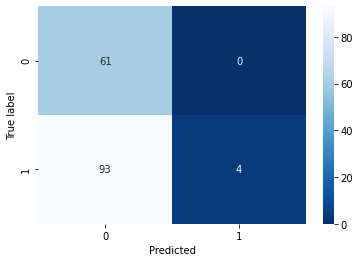

In [115]:
cm = confusion_matrix(y_test, y_pred_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [116]:
metrics_log(y_test, y_pred_)

	Accuracy: 0.41
	Precision: 1.00
	Recall: 0.04


<div class="alert alert-info">
    Так как для заказчика главное отобрать только тех коров, которые дают вкусное молоко, главной метрикой модели является 
precision, так как именно эта метрика показывает насколько точно модель определяет целевой признак - вкусное молоко. Метрика
precision повышается при увеличении порога модели, так как при этом уменьшается число ошибок первого рода (FP). Расчет показал,
что при пороговой вероятности 0,86 число ошибок FP равно 0, то есть метрика precision становится равна 1. Это означает, что,
используя порог 0,86, фермер отберет коров только со вкусным молоком, не смотря на то что какую-то чать таких коров он неминуемо 
пропустит (ошибка FN > 0). Матрица ошибок, вычисленная при условии пороговой авероятности 0,86, показывает, что в тестовой
выборке всего 4 коровы, имеющие вкусное молоко и 93 ошибки второго рода (FN). При повышении порога до 0,86 существенно
понижаются все метрики - accuracy - до 0,41 и recall - до 0,04.
</div>

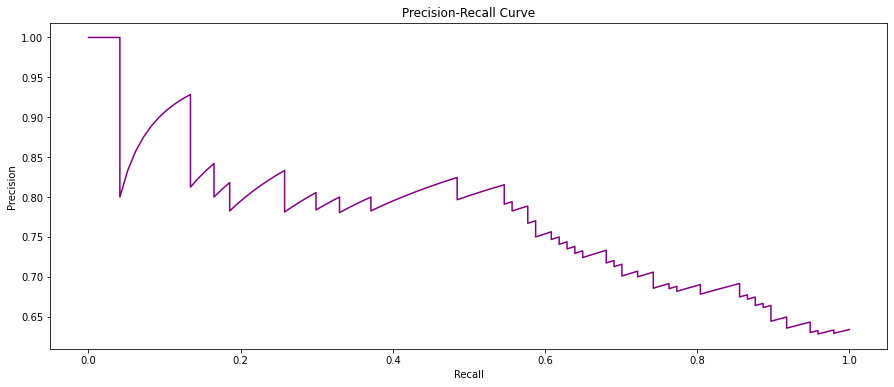

In [117]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall');

<div class="alert alert-info">
     Построенная кривая в координатах precision(recall) показывает, что величина precision = 1 может быть достигнута только 
при значении recall близком к 0. 
</div>

<div class="alert alert-info">
     При увеличении порогового значения модели параметр precision повышается, достигая 1.
</div>

## Применение модели логистической регрессии для прогноза вкуса молока
<a id="start9"></a>

In [118]:
X_new_scaled = scaler.transform(df2[g])
X_new_scaled = pd.DataFrame(X_new_scaled, columns=g)
X_new_ohe = encoder.transform(df2[t])
encoder_col_names = encoder.get_feature_names()
X_new_ohe = pd.DataFrame(X_new_ohe, columns=encoder_col_names)
X_new = pd.concat([X_new_ohe, X_new_scaled], axis=1)

In [119]:
y_pred_new = clf.predict(X_new)

In [120]:
df2['Прогноз вкуса'] = y_pred_new
df2.drop(['Текущая_жирность,%', 'СПО', 'Удой_прогноз'], axis=1)[:5]

,Порода,тип_пастбища,порода_папы,Имя Папы,белок,Возраст,ЭКЕ_2,Протеин,СПО_,Жирность_,Прогноз вкуса
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.076,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,1.0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.081,менее_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,1.0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.074,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,0.0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.061,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,0.0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.074,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,0.0


In [121]:
y_prob_ = clf.predict_proba(X_new)[:,1]

In [122]:
df2.loc[df2['Прогноз вкуса'] == 1, 'Прогноз вкуса'].count(), df2.loc[df2['Прогноз вкуса'] == 0, 'Прогноз вкуса'].count()

(8, 12)

<div class="alert alert-info">
     Построенная модель классификации со стандартным порогом 0,5 выдает 8 единичных прогнозов (вкусное молоко) и 12 нулевых.  
</div>

In [123]:
treshold_ = 0.86
y_pred_fin = []
for i in range(len(y_prob_)):
    if y_prob[i] >= treshold_:
        y_pred_fin.append(1)
    else:
        y_pred_fin.append(0)
df2['Прогноз_финал'] = y_pred_fin
df2.drop(['Текущая_жирность,%', 'СПО'], axis=1)[:5]

,Порода,тип_пастбища,порода_папы,Имя Папы,белок,Возраст,ЭКЕ_2,Протеин,СПО_,Жирность_,Удой_прогноз,Прогноз вкуса,Прогноз_финал
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.076,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6516.178183,1.0,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.081,менее_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6269.912576,1.0,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.074,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6221.037774,0.0,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.061,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6520.291421,0.0,0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.074,более_2_лет,223.889831,2019.532273,СПО_H,Жирн_L,6469.550308,0.0,0


In [124]:
df2.loc[df2['Прогноз_финал'] == 1, 'Прогноз_финал'].count(), df2.loc[df2['Прогноз_финал'] == 0, 'Прогноз_финал'].count()

(1, 19)

In [125]:
df2.loc[df2['Удой_прогноз'] >= 6000, 'Удой_прогноз'].count()

20

<div class="alert alert-info">
     После повышения порога до 0,86 (precision = 1), не смотря на очевидно большое количество ошибок второго рода, модель  
обнаруживает только 1 корову со вкусным молоком. Из 20 оцениваемых коров 19 имеют прогнозный удой более 6000 кг.      
</div>

## Итоговые выводы
<a id="start10"></a>

<div class="alert alert-info">
 
<b>Подготовка и предобработка данных</b>

   Таблица с исходными данными о фермерских коровах содержит 12 полей и 634 строки. Часть количественных характеристик
(жирность, белок, ЭКЕ, СПО) имеют неверный тип 'object' вместо 'float'. Количественные характеристики в столбцах 'жирность', 
'белок', 'ЭКЕ' и 'СПО' были преобразованы в тип 'float'. Пропусков в столбцах таблицы не обнаружено. Обнаружено 5 дублиукатов в строках таблицы. Так как доля дубликатов составляет менее 1 %, то они были удалены без ущерба
данным. Получена таблица числа значений категориальных данных. Поля 'Тип пастбища' и 'порода папы_быка' имеют по 3 значения, а остальные
признаки - по 2 значения. 

<b>Исследовательский анализ данных</b>

   Параметры распределения количественных характеристик показывают, что все исследуемые факторы довольно однородны, так как 
их среднее арифметическое близко к медианному значению. При этом, наибольший размах имеют поля 'Удой' (от 5204 до 45616), 'ЭКЕ'
(от 10,9 до 16,8) и 'Сырой протеин' (от 1660 до 2349). Для них доля std от среднего значения составляет, соответственно, 26%,
9% и 9,5%. То есть, в этих данных присутствуют выбросы в области высоких значений. Менее всего выбросов в поле 'Белок', имеющем
минимальный разброс от 3,069 до 3,085 и долю std к mean порядка 0,08%. В поле 'Удой, кг' максимальное значение 45616 на порядок выше остальных, что свидетельствует об ошибке данных. Скорее всего
это значение нужно уменьшить на пморядок. После преобразования в данном поле получили данные с близким распределением - 
медиана (6132) очень близка к среднему (6123,5), а размах значений в пределах 4561,6 - 7222. Для количественных характеристик были построены гистограммы и диаграммы распределения. Признак 'Удой, кг' распределен более-
менее равномерно вокгруг интервала 6000-6500 с небольшим смещением влево. Есть, как минимум 1 выброс в сторону низких значений.
Гистограмма признака 'ЭКЕ' неравномерно распределана вокруг интервала 15 - 15,5 с сильным смещением воево, выбросов значений нет.
Максимум гистограммы признака 'Протеин' приходится на интервал 1700 - 1850, распределение имеет право-односторонний характер 
без выбросов. Гистограмма 'СПО' разбита на 3 интервала (0,84-0,86, 0,88-0,9 и 0,92-0,96), между которыми практически нет точек.
Данная кистогроамма имеет лево-односторонний характер с максимумом в интервале 0,92-0,96, выбросы в распределении 'СПО' 
отсутствуют. Гистограмма фактора 'Жирность' имеет лево-односторонний характер с максимумом в интервале 3,65-3,75 и с большим 
количеством выбросов в сторону низких значений. Гистограмма фактора 'Белок' имеет двухстороннюю структура с 2 максимумами 
в интервалах 3,074-3,075 и 3,077-3,078. Гистограмма смещена вправо, есть небольшое число выбросов в обе стороны. 

<b> Корреляционный анализ </b>

    Матрица корреляции показывает, что признаки СПО, ЭКЕ, жирность и протеин достаточно хорошо коррелируют с Удоем, коэффициенты
корреляции составляют, соответственно, 0,8, 0,77, 0,61 и 0,45. Фактор 'Белок' на удой не влияет. Есть также взаимная корреляция
влияющих признаков: ЭКЕ умеренно коррелирует с Жирностью (0,64), СПО (0,74) и менее плотно - с протеином (0,39). Жирность 
умеренно коррелирует с СПО (0,62) и слабее с протеином (0,36). Белок практически не коррелирует с остальными количественными
характеристиками, за исключением Протеина, где наблюдается слабая прямая корреляция (0,23). Точечная диаграмма распределения удоя при увеличении ЭКЕ, в целом, характеризует прямопропорциональную зависимость во всех
группах при разбивке по типам пород и пастбищ, а также по показателю вкуса. Зависимости удоя от ЭКЕ по признакам порода папы и 
возраст более фрагментированы: при разбивке по породе папы в обоих группах наблюдается прямая зависимость Удой-ЭКЕ, но группа 
Айдиал, в целом, имеет более высокие удои, чем группа Северин. Также, при разбивке по возрасту зависимость удои-ЭКЕ в группе 
'более 2 лет' прямопропорциональна, а в группе 'менее 2 лет' удои отчетливо ниже, а какая-либо зависимость в паре удои-ЭКЕ 
отсутствует. В паре удои-протеин при разбивке по породе, типу пастбища и вкусу получаются однородные группы, в которых
наблюдается близкая к нулю прямая зависимость, причем в подгруппах 'вкусно' и 'холмистые' эта прямая зависимость немного больше
выражена. При разбивке по породе папы и возрасту подгруппы 'Айдиал' и 'более 2 лет' отчетливо лидируют по удоям, причем в этих
подгруппах слабая прямая зависимость в паре удои-ЭКЕ немного более выражена. Опять же в подгруппе 'менее 2 лет' зависимость 
в паре удои-ЭКЕ полностью отсутствует. В паре удои-СПО на всех диаграммах наблюдается разрыв линейности и распределение точек
на три группы: первые 2 группа в окрестностях 0,85 и 0,9 СПО имеют одинаковый средний уровень удоев, а третья групп в 
окрестности 0,95 СПО имеет средний уровень удоев примерно на 1000 выше, чем в первых 2 группах. При этом во всех 3 группах 
какая-либо зависимость в паре удои-СПО отсутствует. Порода 'Вис бик Айдиал' больше представлена во 2 группе СПО (0,9), а порода 
'РефрешнСоверинг' - в 3 высокоудойной группе СПО (0,95). Точки в подгруппах по признаку 'пастбища' более-менее равномерно 
распределены во всех группах СПО, а точки с признаком 'вкусно' преобладают в высокоудойной группе СПО (0,95). Точки с признаками
'Айдиал' и 'более 2 лет' абсолютно доминируют в более удойной группе СПО (0,95), а в остальных группах СПО (0,85 и 0,9) также
преобладают в верхних областях диаграммы. На диаграммах пары удои-жирность также присутствует разрыв линейности в окрестности
значения жирности 3,7. Для этой пары также выделяются 3 области диаграммы: разряженная в интервале жирности 3 - 3,5 (низкая
плотность точек) и 2 плотных группы: с жирностью 3,6 и жирностью 3,8. Во всех этих группахъ жирности зависимость в паре 
удои - жирность практически отсутствует, а группы жирности отличаются средними удоями: группа жирности 3 - 3,5 имеет средний удой
около 5500, для группы с жирностью 3,6 средние удои - около 6000, а группа с жирностью 3,8 имеет наибольший средний удой - 
порядка 6500. Все точки с разными породами, типами пастбищ и признаками фвкуса более-менее равномерно распределены по всем 3
группам жирности (холмистые пастбища немного доминируют, по сравнению с равнинными во всех группах жирности). Точки с возрастом
'более 2 лет' и породой 'Айдиал' доминируют в верхней части диаграммы во 2 и 3 группах жирности (3,6 и 3,8), но в разряженной 
группе с низкой жирностью (3 - 3,5) породы Айдиал и РефрешнСоверинг распределены равномерно, а возраст 'более 2 лет' абсолютно
доминирует в области повышенных удоев. На диаграммах удои-белок заметной зависимости не обнаруживается. В молоке породы 
'Вис Бик Айдиал' относительно более высокое содержание белка, по сравнению с породой 'РефлешнСоверинг'. Точки в подгруппах
'тип пастбища' и 'порода_папы' в паре удои-белок точки распределены равномерно, но в погруппах 'Холмистое' и 'Айдиал' преобладают
точки с более высокими удоями. Точки в категориях 'вкусно' и 'невкусно' равномерно распределены на диаграмме удои-белок, а в 
категории 'более 2 лет' точки с относительно высокими удоями доминируют.  

<b> Обучение модели линейной регрессии </b>

   Из количественных признаков самый сомнительный 'Белок', так как корреляция между данным показателем и целью ('Удои') 
практически отсутствует. Однако, 'Белок' слабо связан с 'Протеином' (корр 0,23), а 'Протеин' имеет отчетливую прямую связь с
целью (корр 0,45), поэтому 'Белок' полезно оставить в списке влияющих признаков. Из категориальных признаков более всего влияют
на цель 'Возраст', 'порода_папы' и немного 'тип пастбища', а признаки 'порода' и 'Вкус молока' практически не влияют на Удои, и
их можно исключить. Ошибка модели линейной регрессии r2 составляет 0,83, то есть модель ошибается в предсказании в 17% случаев.  
Гистограмма распределения остатков модели показывает распределение близкое к нормальному с небольшим смещением вправо. 
Точечная диаграмма распределения остатков показывает определенную зависимость между остатками и предсказаниями, имеющую форму
вогнутой дуги. В целом, ошибка модели r2 (0,87) и анализ остатков свидетельствуют о недостаточном качестве модели линейной 
регрессии из-за отсутствия линейной зависимости между целью и одним или несколькими признаками. Для зависимости цели от 
признака 'ЭКЕ' возведение аргумента в квадрат малоэффективно и практически не влияет на коэффициент корреляции. После перевода
нелинейных количественных признаков в катериальные метрики модели немного улучшились: r2 вырос с 0,83 до 0,85, а также немного 
снизились MAE и MSE. Распределение остатков приблизилось к нормальному без сдвигов, но с наличием выбросов левее нуля. Точечное
распределение остатков сохраняет дугообразую, хотя и менее выраженную форму. Таблица с именем папы имеет столько же строк, что 
и главная таблица с удоями, поэтому их можно объединить по полю 'id' коровы. Пропусков в имени папы нет, типы данных верные.
Новый фактор 'Имя Папы' определенно влияет на цель: на диаграммах Удой-ЭКЕ_2 и Удой-Протеин видно, что потомство Буйного и 
Геркулеса дает более высокие удои, у потомков Барина удои заметно ниже. После введения нового признака 'Имя Папы' точность 
модели выросла: метрика r2 увеличилась до 0,87. Распределение остатков стало более симметричным относительно 0, и на 
гистограмме исчезли выбросы. Точечное распределение на диаграмме остатки-предсказания по-прежнему имеет определенную 
дугообразную зависимость. Таблица df2 с данными для расчета удоев содержит 20 рядов и не имеет пропусков данных. Тип 
категориальных данных верный (object), а числовой столбец 'Текущая_жирность,%' был преобразован в тип float. Столбец 
'Текущий_уровень_белок,%' также имеет неверный тип object, но данные этого столбца не используются в модели из-за отсутствия 
связи между белком и целью.
    
<b> Результаты применения модели линейной регрессии </b>

    Лучшей лийнейной моделью для оценки потенциального удоя коров является третья модель, включающая фактор имя_папы: данная
модель имеет наибольшее значение метрики r2 (0.87), а также минимальные значения метрик MSE (35057) и MAE (150). Данная модель
была использована для оценки удоев с учетом усреднения имеющихся значений факторов СПО, Жирности и ЭКЕ, которые также были 
увеличены на 5 % по условию исследования. В результате, средний прогнозный удой составляет 6292 кг, что на 168,5 кг выше, по 
сравнению со средним удоем коров в исходных данных (6123,5 кг). 
    
<b> Логистическая регрессия - бинарная классификация </b>
    
     Средние значения количественных характеристик влияющих факторов распределяются таким образом, что вкусное молоко 
характеризуется относительно более высокими значениями ЭКЕ_2 и Протеина. Белок же не влияет на вкус молока и его можно исключить.
 Факторы Тип пастбища и Возраст значительно влияют на вкус молока: большинство коров со вкусным молоком паслись на 
холмистых пастбищах и имели возраст более 2 лет. Порода_папы влияет на вкус молока очень слабо с небольшим преобладанием 
фактора 'Айдиал'. Число коров со вкусным молоком преобладают в случае относительно высоких значений фактороа СПО (СПО_Н) и 
жирности (Жирн_H). Кроме того, число коров со вкусным молоком заметноь убывает в ряду потомков Барина - Буйного - Соловчика - 
Геркулеса. Из количественных характеристик наибольший вес имеет фактор ЭКЕ (0,64), далее идет Протеин (0,22), а Белок 
практически не влияет на результат (-0,07). Метрика точности модели относительно верных позитивных (TP) и негативных (TN) 
прогнозов accuracy составляет 0,65. При этом способность модели находить целевой признак (Recall) составляет 0,76 и превосходит 
точность модели при идентификации цели (Precision = 0.69). Матрица ошибок показывает, что на тестовой выборке модель выдает 28
правильных ответов тип TN и 74 правильных ответа типа TP, а также 33 ошибки первого рода (FP) и 23 ошибок второго рода (FN).
Так как для заказчика главное отобрать только тех коров, которые дают вкусное молоко, главной метрикой модели является 
precision, так как именно эта метрика показывает насколько точно модель определяет целевой признак - вкусное молоко. Метрика
precision повышается при увеличении порога модели, так как при этом уменьшается число ошибок первого рода (FP). Расчет показал,
что при пороговой вероятности 0,86 число ошибок FP равно 0, то есть метрика precision становится равна 1. Это означает, что,
используя порог 0,86, фермер отберет коров только со вкусным молоком, не смотря на то что какую-то чать таких коров он неминуемо 
пропустит (ошибка FN > 0). Матрица ошибок, вычисленная при условии пороговой авероятности 0,86, показывает, что в тестовой
выборке всего 4 коровы, имеющие вкусное молоко и 93 ошибки второго рода (FN). При повышении порога до 0,86 существенно
понижаются все метрики - accuracy - до 0,41 и recall - до 0,04.

<b> Результат лигистической регрессии </b>

    Построенная модель классификации со стандартным порогом 0,5 выдает 8 единичных прогнозов (вкусное молоко) и 12 нулевых.
После повышения порога до 0,86 (precision = 1), не смотря на очевидно большое количество ошибок второго рода, модель  
обнаруживает только 1 корову со вкусным молоком. Из 20 оцениваемых коров 19 имеют прогнозный удой более 6000 кг. 

</div>

## Рекомендации
<a id="start11"></a>

<div class="alert alert-info">
     1) Для того, чтобы модель бинарной классификации помогла выбрать больше коров со вкусным молоком необходимо снизить величину 
порога классификации до 0,75:
</div>

In [126]:
treshold_ = 0.75
y_pred_s = []
for i in range(len(y_prob)):
    if y_prob[i] >= treshold_:
        y_pred_s.append(1)
    else:
        y_pred_s.append(0)

In [127]:
metrics_log(y_test, y_pred_s)

	Accuracy: 0.49
	Precision: 0.81
	Recall: 0.22


<div class="alert alert-info">
     При снижении порога до 0,75 величина precision достаточно высока и составляет 0,81. 
</div>

In [128]:
treshold_ = 0.75
y_pred_f = []
for i in range(len(y_prob_)):
    if y_prob[i] >= treshold_:
        y_pred_f.append(1)
    else:
        y_pred_f.append(0)

In [129]:
y_pred_f.count(1)

4

<div class="alert alert-info">
     Снижение порога до 0,75 и фиксирование precision на уровне 0,81 позволит достаточно безопасно отобрать 4 коров из 20. 
</div>

<div class="alert alert-info">
     2) Для дальнейшего повышения качества модели наиболее перспективным представляется добавление новых признаков, так как
возможности по коррекции имеющих факторов исчерпаны. Новые признаки позволят повысить точноть определения целевого признака - 
вкуса молока и обеспечат минимальное (нулевое) число ложноположительных ошибок при более низком пороге классфикации, что 
снизит объем выбраковки тестируемых коров. 
</div